In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
df=pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
X=df.iloc[:,:3]
y=df['sales']

<Axes: xlabel='TV', ylabel='sales'>

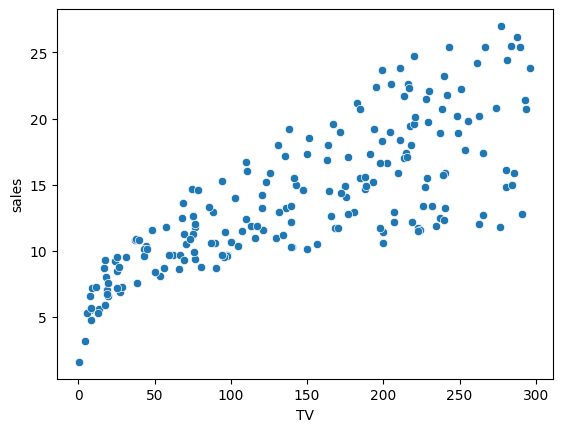

In [4]:
sns.scatterplot(df,x='TV',y='sales')

<Axes: xlabel='radio', ylabel='sales'>

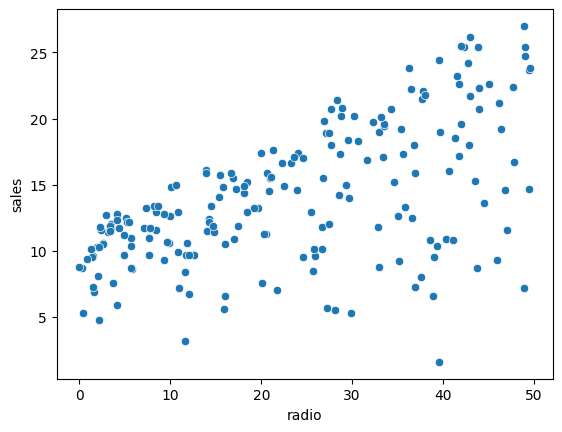

In [5]:
sns.scatterplot(df,x='radio',y='sales')

<Axes: xlabel='newspaper', ylabel='sales'>

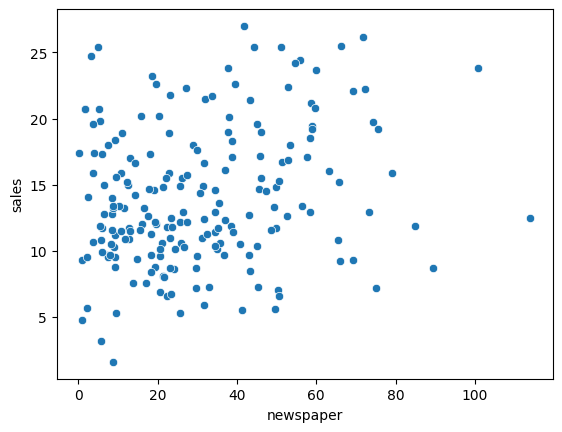

In [6]:
sns.scatterplot(df,x='newspaper',y='sales')

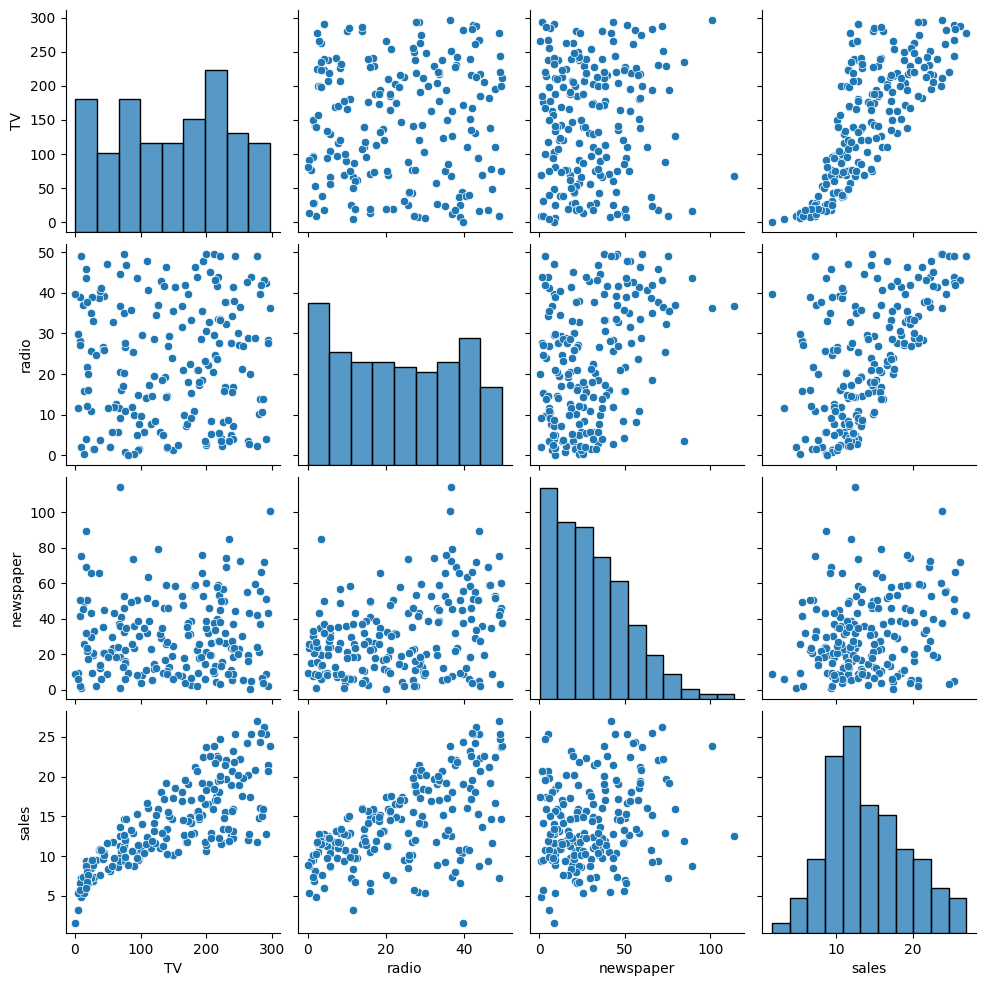

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
yHat=model.predict(X_test)


In [14]:
RMSE=np.sqrt((sum(y_test-yHat))**2/len(yHat))
RMSE

1.417626685634374

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
RMSE=np.sqrt(mean_squared_error(y_test,yHat))
print(RMSE)

1.516151937599388


In [18]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

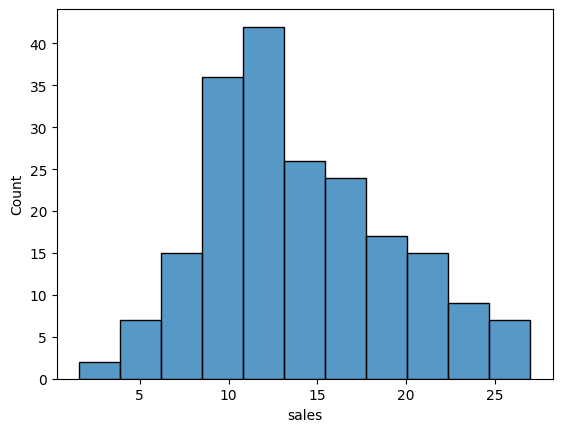

In [21]:
sns.histplot(df,x='sales')

In [23]:
mean_absolute_error(y_test,yHat)

1.2137457736144803

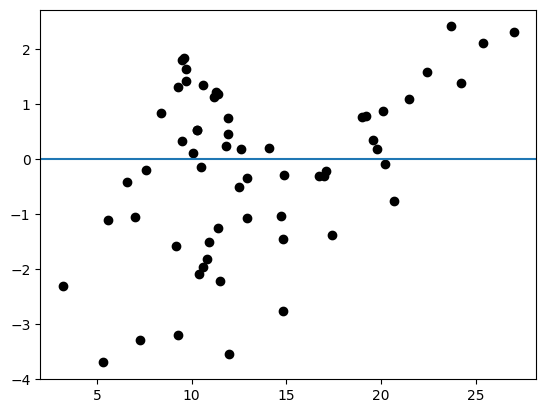

In [31]:
eps=y_test-yHat
plt.plot(y_test,eps,'ko')
# plt.plot([min(y_test),max(y_test)], [0,0],'r--')
plt.axhline(y=0)

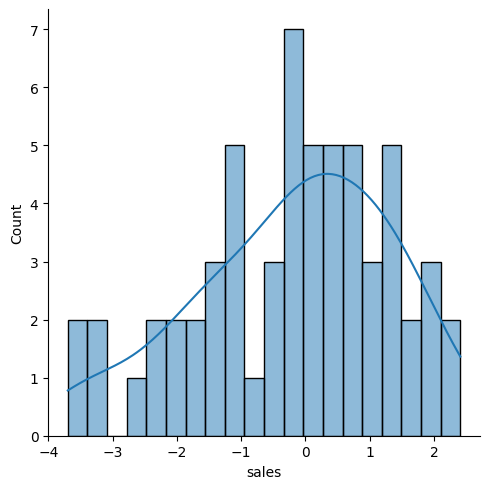

In [35]:
sns.displot(eps,bins=20,kde=True)

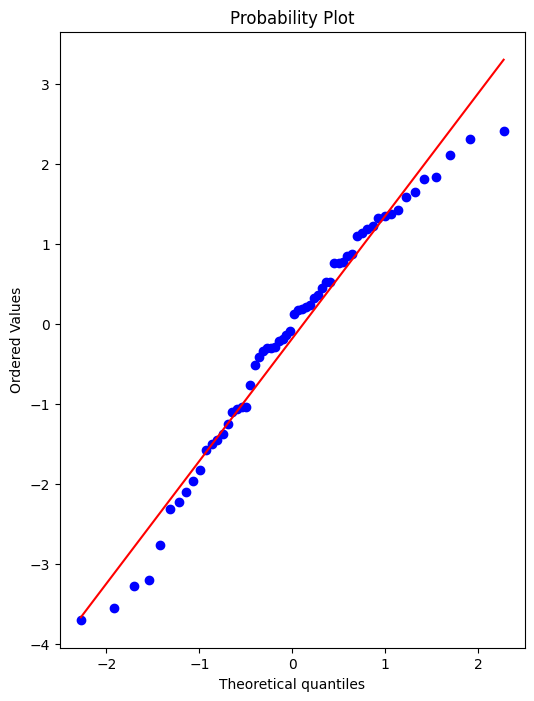

In [40]:
import scipy as sp
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(eps,plot=ax)
# plt.show()

In [83]:
finalModel=LinearRegression()


In [84]:
finalModel.fit(X,y)


LinearRegression()

In [85]:
finalModel.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [82]:
X.drop('yHatT',axis=1,inplace=True)

KeyError: "['yHatT'] not found in axis"

In [86]:
yHatT=finalModel.predict(X)


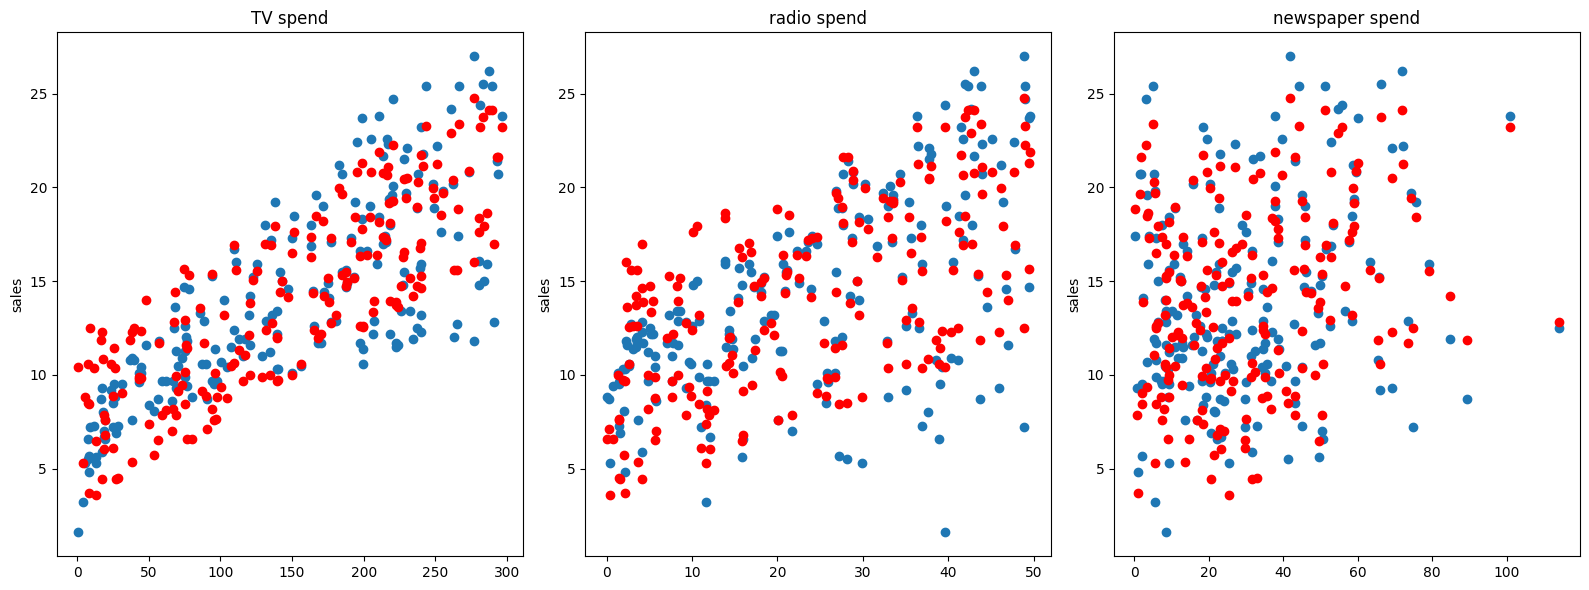

In [87]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(df['TV'],df['sales'],'o')
ax[0].plot(df['TV'],yHatT,'o',color='red')
ax[0].set_title('TV spend')
ax[0].set_ylabel('sales')
ax[1].plot(df['radio'],df['sales'],'o')
ax[1].plot(df['radio'],yHatT,'o',color='red')
ax[1].set_title('radio spend')
ax[1].set_ylabel('sales')
ax[2].plot(df['newspaper'],df['sales'],'o')
ax[2].plot(df['newspaper'],yHatT,'o',color='red')
ax[2].set_title('newspaper spend')
ax[2].set_ylabel('sales')
plt.tight_layout()

In [88]:
from joblib import dump,load

In [89]:
dump(finalModel,'final_sales_model.joblib')


['final_sales_model.joblib']

In [90]:
loaded_model=load('final_sales_model.joblib')

In [91]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [92]:
X.shape

(200, 3)

In [93]:
X.drop('yHatT',axis=1,inplace=True)

KeyError: "['yHatT'] not found in axis"

In [94]:
campaign=[[149,22,12]]

In [95]:
loaded_model.predict(campaign)

/home/atena/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])